In [24]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import FunctionTransformer
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

hotel_data = pd.read_csv("hotel.csv", low_memory=False)

### DS INSPECTION

In [25]:
hotel_data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [26]:
hotel_data.shape

(119390, 32)

In [27]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [28]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [29]:
hotel_data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

### DS CLEANING

In [30]:
# Dropped this feature because we have already the date separated in other features 
hotel_data.drop('reservation_status_date', inplace=True, axis=1)
hotel_data.drop('reservation_status', inplace=True, axis=1)
hotel_data.shape

(119390, 30)

In [31]:
# Convert "children" column to numeric, replacing non-numeric values with NaN
hotel_data['children'] = pd.to_numeric(hotel_data['children'], errors='coerce')

# Calculate the mean of the numeric values in the "children" column
mean_children = hotel_data['children'].mean()

# Replace "na" strings with the mean
hotel_data['children'].fillna(mean_children, inplace=True)
hotel_data.shape

c:\Temp\ipykernel_9740\535892568.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_data['children'].fillna(mean_children, inplace=True)


(119390, 30)

In [32]:
# check if it worked and there is no "na"
hotel_data['children'].unique()

array([ 0.       ,  1.       ,  2.       , 10.       ,  3.       ,
        0.1038899])

In [33]:
hotel_data.fillna(0, inplace=True)
hotel_data.shape

(119390, 30)

In [34]:
hotel_data.isna().any().any()

False

In [35]:
hotel_data.shape

(119390, 30)

### SPLIT, SCALE, ENCODE

In [36]:
# split to features / label
y = hotel_data['is_canceled']
X = hotel_data.drop('is_canceled', axis=1)
print(X.shape)
print(y.shape)

(119390, 29)
(119390,)


In [37]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
def transfome_preprocessor(X_train, X_test):    
    categorical_features = ['customer_type',
                           'deposit_type', 'assigned_room_type', 'reserved_room_type', 'distribution_channel',
                           'market_segment', 'country', 'meal', 'hotel', 'arrival_date_month']
    for key in categorical_features:
        X_train[key] = X_train[key].astype(str)
        X_test[key] = X_test[key].astype(str)
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', dtype='int', drop='first'))
    ])
    numeric_features = ['total_of_special_requests', 'required_car_parking_spaces', 'adr',
                       'days_in_waiting_list', 'booking_changes', 'previous_bookings_not_canceled',
                       'previous_cancellations', 'babies', 'children', 'adults', 'stays_in_week_nights',
                       'stays_in_weekend_nights', 'arrival_date_day_of_month', 'arrival_date_week_number',
                       'lead_time']
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    # scale, encode and skip columns with 1/0 values
    preprocessor = ColumnTransformer(
        transformers=[
            ('encode', categorical_transformer, categorical_features),
            ('scale', numeric_transformer, numeric_features),
            ('skip', 'passthrough', ['is_repeated_guest'])
        ])
    processed_data_train = preprocessor.fit_transform(X_train)
    transformed_features_train = pd.DataFrame.sparse.from_spmatrix(processed_data_train, columns=preprocessor.get_feature_names_out())
    processed_data_test = preprocessor.transform(X_test)
    transformed_features_test = pd.DataFrame.sparse.from_spmatrix(processed_data_test, columns=preprocessor.get_feature_names_out())
    return (transformed_features_train, transformed_features_test)

In [39]:
X_train, X_test = transfome_preprocessor(X_train, X_test)

C:\Users\magshimim\anaconda3\envs\hotel_venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### BALANCE DS

In [40]:
# Check class distribution
class_distribution = Counter(y)
print("Class distribution:", class_distribution)


Class distribution: Counter({0: 75166, 1: 44224})


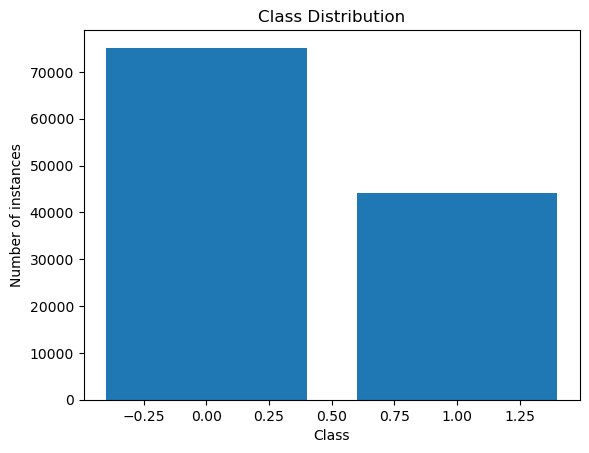

In [41]:
# Visualize class distribution
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Class Distribution')
plt.show()

In [42]:
class_distribution = Counter(y)
print("Class distribution:", class_distribution)


Class distribution: Counter({0: 75166, 1: 44224})


In [43]:
# balancing the train data
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
train_data = pd.concat([X_train, y_train], axis=1)
print(train_data.isna().any().any())
print(y_train)

# Calculate the number of zeros and ones in y_train
zeros_count = (y_train == 0).sum()
ones_count = (y_train == 1).sum()

# Reduce the occurrence of zeros to match the count of ones
if zeros_count > ones_count:
    zeros_to_remove = zeros_count - ones_count
    train_data = train_data.drop(train_data[train_data['is_canceled'] == 0].sample(zeros_to_remove, random_state=42).index)
elif ones_count > zeros_count:
    ones_to_remove = ones_count - zeros_count
    train_data = train_data.drop(train_data[train_data['is_canceled'] == 1].sample(ones_to_remove, random_state=42).index)

# Separating X_train and y_train after balancing
X_train = train_data.drop(columns=['is_canceled'])
y_train = train_data['is_canceled']


False
0        1
1        0
2        1
3        1
4        0
        ..
95507    0
95508    0
95509    0
95510    1
95511    0
Name: is_canceled, Length: 95512, dtype: int64


In [44]:
#check the blanced train

Class distribution: Counter({1: 35253, 0: 35253})


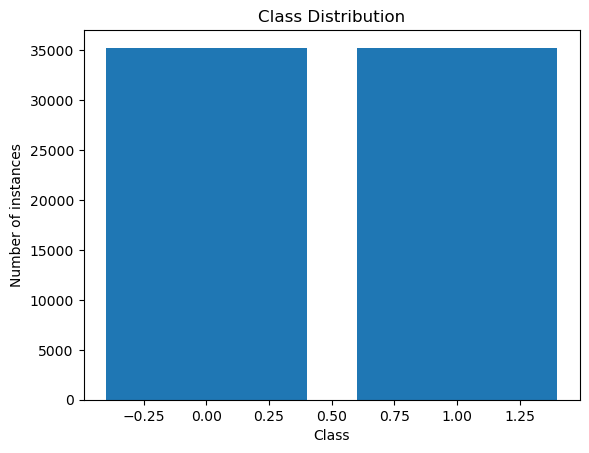

In [45]:
class_distribution = Counter(y_train)
print("Class distribution:", class_distribution)
# Visualize class distribution
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Class Distribution')
plt.show()

### TRAIN LOGISTIC REGRESSION

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from tabulate import tabulate
import sys
np.set_printoptions(threshold=sys.maxsize)
logreg = LogisticRegression(max_iter=1000)

cv_predictions = cross_val_predict(logreg, X_train, y_train, cv=5)  # 5-fold cross-validation

# Fit the model with all training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = logreg.predict(X_test)

# Print classification report for cross-validation
print("Cross-validation results:")
target_names = ['no_cancel', 'yes_cancel']
print(classification_report(y_train, cv_predictions, target_names=target_names))

# Print classification report for test set
print("\nTest set results:")
print(classification_report(y_test, test_predictions, target_names=target_names))


Cross-validation results:
              precision    recall  f1-score   support

   no_cancel       0.79      0.83      0.81     35253
  yes_cancel       0.82      0.78      0.80     35253

    accuracy                           0.80     70506
   macro avg       0.80      0.80      0.80     70506
weighted avg       0.80      0.80      0.80     70506


Test set results:
              precision    recall  f1-score   support

   no_cancel       0.87      0.84      0.85     14907
  yes_cancel       0.74      0.79      0.76      8971

    accuracy                           0.82     23878
   macro avg       0.80      0.81      0.81     23878
weighted avg       0.82      0.82      0.82     23878



### COMPARE 4 BINARY CLASSIFICATION MODELS

In [47]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tabulate import tabulate

# Instantiate the models
models = {
    "Extreme Gradient Boosting": XGBClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()
}

# Dictionary to store classification reports
reports = {}

# Fit models and generate classification reports using cross-validation
for model_name, model in models.items():
    print(model_name)
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    print(cv_scores)
    # Fit the model with all training data
    model.fit(X_train, y_train)
    print("fited")
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Generate classification report
    report = classification_report(y_test, predictions, output_dict=True)
    
    # Store classification report
    reports[model_name] = {
        "classification_report": report,
        "cross_validation_f1": cv_scores.mean()
    }

# Extracting precision, recall, f1-score, and cross-validation accuracy for each model
table_data = []
for metric in ['precision', 'recall', 'f1-score']:
    row = [metric]
    for model_name in models.keys():
        row.append(reports[model_name]['classification_report']['1'][metric])
    table_data.append(row)
    print(row)

# Add cross-validation F1-score
cross_val_row = ["Cross-Validation F1-score"]
for model_name in models.keys():
    cross_val_row.append(reports[model_name]['cross_validation_f1'])
table_data.append(cross_val_row)

# Print the table
print(tabulate(table_data, headers=["Metric"] + list(models.keys()), tablefmt="grid"))

Extreme Gradient Boosting
[0.85389889 0.85630999 0.85890528 0.85578154 0.85229682]
fited
Logistic Regression
[0.79871176 0.79773486 0.79829566 0.79849286 0.79788006]
fited
Gradient Boosting
[0.81912803 0.82000288 0.8229219  0.82175489 0.81950729]
fited
KNeighborsClassifier
[0.80634566 0.80503841 0.80495742 0.8133074  0.80754613]
fited
['precision', 0.7897894843893013, 0.7415895710681245, 0.7611893583724569, 0.703596179059749]
['recall', 0.8656782967339204, 0.7863114479991082, 0.813287258945491, 0.837476312562702]
['f1-score', 0.8259944692618592, 0.7632960017313207, 0.7863763742185816, 0.7647208509338898]
+---------------------------+-----------------------------+-----------------------+---------------------+------------------------+
| Metric                    |   Extreme Gradient Boosting |   Logistic Regression |   Gradient Boosting |   KNeighborsClassifier |
+===========================+=============================+=======================+=====================+=====================

C:\Users\magshimim\anaconda3\envs\hotel_venv\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


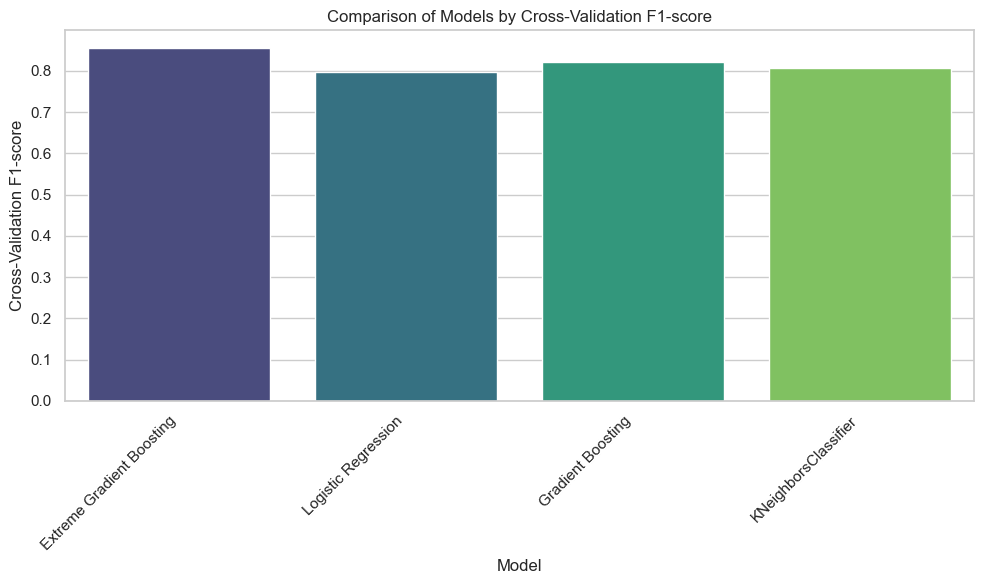

In [54]:

# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=cross_val_row[1:], palette="viridis")
plt.title("Comparison of Models by Cross-Validation F1-score")
plt.xlabel("Model")
plt.ylabel("Cross-Validation F1-score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()